In [50]:
import regex
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


whole_text = utils.load_whole_text('./ustawy/*')
text_by_file = utils.load_files('./ustawy/*')


1. For each bill compute the number of the following amendments present in the bill:
   * addition of a unit (e.g. **dodaje się ust. 5a**),
   * removal of a unit (e.g. **w art. 10 ust. 1 pkt 8 skreśla się**),
   * change of a unit (e.g. **art. 5 otrzymuje brzmienie**).
1. Note that other types of changes, e.g. **po wyrazach "na dofinansowanie" dodaje się wyrazy " , z zastrzeżeniem art. 21a,"**, must not be included in the result.

In [51]:
addition = r'(?<!")(\s|\n)dodaje(\s|\n)się(\s|\n)(?!(wyraz(y?)|zdani(e|a)))'
removal = r'(skreśla|uchyla)(\s|\n)się(\s|\n)(?=(ust|pkt|lit|art|§))'
change = r'(ust\.|pkt|lit\.|art\.|§)(\s|\n)[\w\s]+?(\s|\n)otrzymuj(e|ą)(\s|\n)brzmienie'

for file,text in text_by_file.items():
    additions = len(regex.findall(addition, text))
    removals = len(regex.findall(removal, text))
    changes = len(regex.findall(change, text))
    print(f'{file}: additions: {additions} removals: {removals} chagnes: {changes}')

./ustawy/2000_381.txt: additions: 1 removals: 0 chagnes: 1
./ustawy/2003_1851.txt: additions: 3 removals: 0 chagnes: 2
./ustawy/2004_573.txt: additions: 0 removals: 0 chagnes: 0
./ustawy/2003_1759.txt: additions: 4 removals: 0 chagnes: 3
./ustawy/2003_661.txt: additions: 24 removals: 4 chagnes: 26
./ustawy/2003_2221.txt: additions: 39 removals: 12 chagnes: 64
./ustawy/1995_184.txt: additions: 0 removals: 1 chagnes: 2
./ustawy/2000_857.txt: additions: 1 removals: 0 chagnes: 0
./ustawy/1995_221.txt: additions: 2 removals: 0 chagnes: 0
./ustawy/1996_367.txt: additions: 3 removals: 2 chagnes: 11
./ustawy/1995_729.txt: additions: 21 removals: 9 chagnes: 31
./ustawy/2000_484.txt: additions: 0 removals: 0 chagnes: 0
./ustawy/2003_2263.txt: additions: 5 removals: 8 chagnes: 8
./ustawy/2003_335.txt: additions: 0 removals: 0 chagnes: 1
./ustawy/1997_604.txt: additions: 7 removals: 0 chagnes: 3
./ustawy/1997_753.txt: additions: 4 removals: 0 chagnes: 5
./ustawy/2000_1268.txt: additions: 44 remova

3. Plot results from point 1 showing how the **percentage** of amendments of a given type changed in the consecutive years.

In [56]:
year = r'((\n\s*(USTAWA|U S T A W A)\s*(KONSTYTUCYJNA|BUDŻETOWA\r?\n?\s*NA\s+ROK\s+\d{4})?)(\r?\n)\s*z(\r?\n|\s+)dnia\s+\d\d?\s+[\wąężźćśńół]+\s+)(\d{4})\r?\n?\s*r\.'

year_p = regex.compile(year, regex.IGNORECASE)

# text = text_by_file['./ustawy/2001_679.txt']

# print(year_p.search(text).group(7))

additions = defaultdict(lambda: 0)
removals = defaultdict(lambda: 0)
changes = defaultdict(lambda: 0)
years = set()
rows = []

for file,text in text_by_file.items():
    a = len(regex.findall(addition, text))
    r = len(regex.findall(removal, text))
    c = len(regex.findall(change, text))
    y = year_p.search(text).group(7)

    additions[y] += a
    removals[y] += r
    changes[y] += c 
    years.add(y)

for year in years:
    a = additions[year]
    r = removals[year]
    c = changes[year]
    total = a + r + c
    if total != 0:
        a /= total
        r /= total
        c /= total
    
    rows.append([int(year),a,r,c])

<AxesSubplot:title={'center':'percentage of amendments of a given type'}, ylabel='year'>

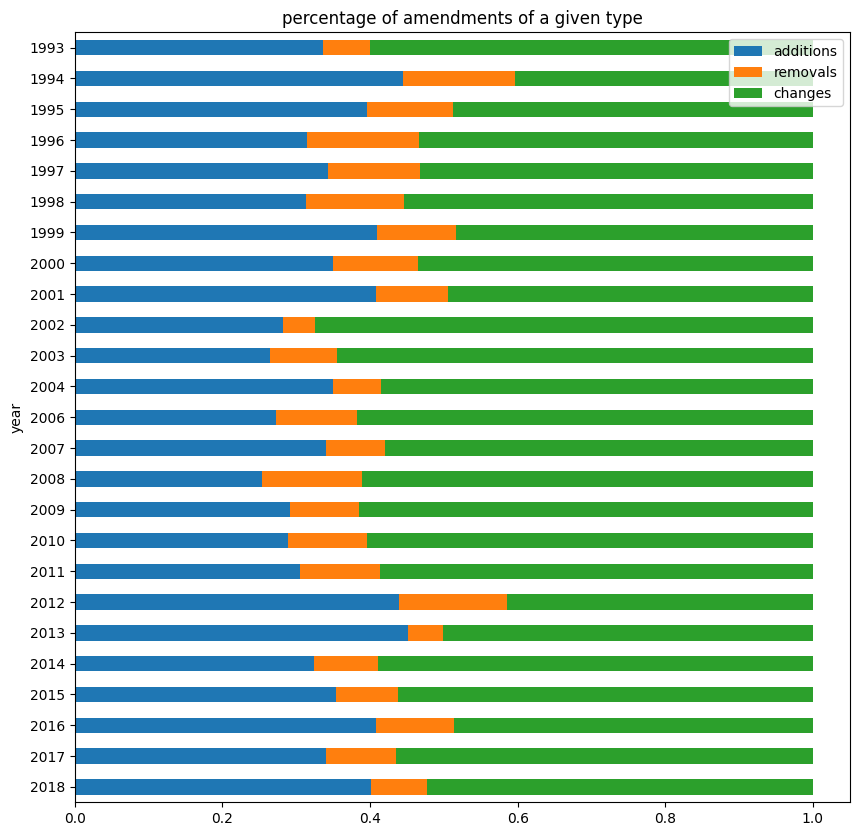

In [60]:
df = pd.DataFrame(rows, columns=['year', 'additions', 'removals', 'changes'])

df = df.sort_values(by=['year'], ascending=False)

df.plot(
    figsize=(10,10),
    x = 'year',
    kind = 'barh',
    stacked = True,
    title = 'percentage of amendments of a given type',
    mark_right = True)

4. Compute the total number of occurrences of the word **ustawa** in any inflectional form (*ustawa*, *ustawie*, *ustawę*, etc.)
   and all spelling forms (*ustawa*, *Ustawa*, *USTAWA*), excluding other words with the same prefix (e.g. *ustawić*).

In [63]:
ustawa = r'\bu\s?s\s?t\s?a\s?w\s?(a|ą|i\s?e|ę|y|o\s?m)\b'
ustawa_p = regex.compile(ustawa, regex.IGNORECASE)

ustawa_count = len(ustawa_p.findall(whole_text))
print(ustawa_count)

23913


5. Compute the total number of occurrences of the same word (same conditions), followed by **z dnia** expression.

In [64]:
ustawa_z_dnia = r'\bu\s?s\s?t\s?a\s?w\s?(a|ą|i\s?e|ę|y|o\s?m)\b(?=\r?\n?\s*z\r?\n?\s*dnia)'
ustawa_z_dnia_p = regex.compile(ustawa_z_dnia, regex.IGNORECASE)

ustawa_z_dnia_count = len(ustawa_z_dnia_p.findall(whole_text))
print(ustawa_z_dnia_count)

8728


6. As above, but **not** followed by **z dnia** expression. Is the result correct (result 4 =? result 5 + result 6)?

In [65]:
ustawa_nie_z_dnia = r'\bu\s?s\s?t\s?a\s?w\s?(a|ą|i\s?e|ę|y|o\s?m)\b(?!\r?\n?\s*z\r?\n?\s*dnia)'
ustawa_nie_z_dnia_p = regex.compile(ustawa_nie_z_dnia, regex.IGNORECASE)

ustawa_nie_z_dnia_count = len(ustawa_nie_z_dnia_p.findall(whole_text))
print(ustawa_nie_z_dnia_count)

15185


In [66]:
assert ustawa_count == ustawa_z_dnia_count + ustawa_nie_z_dnia_count

7. Compute the total number of occurrences of the word **ustawa** in any inflectional form, excluding occurrences
   following **o zmianie** expression.

In [67]:
ustawa_nie_o_zmianie = r'(?<!o\r?\n?\s*zmianie\r?\n?\s*)\bu\s?s\s?t\s?a\s?w\s?(a|ą|i\s?e|ę|y|o\s?m)\b'
ustawa_nie_o_zmianie_p = regex.compile(ustawa_nie_o_zmianie, regex.IGNORECASE)

ustawa_nie_o_zmianie_count = len(ustawa_nie_o_zmianie_p.findall(whole_text))
print(ustawa_nie_o_zmianie_count)

23064


8. Plot results 4-7 using a bar chart.

<BarContainer object of 4 artists>

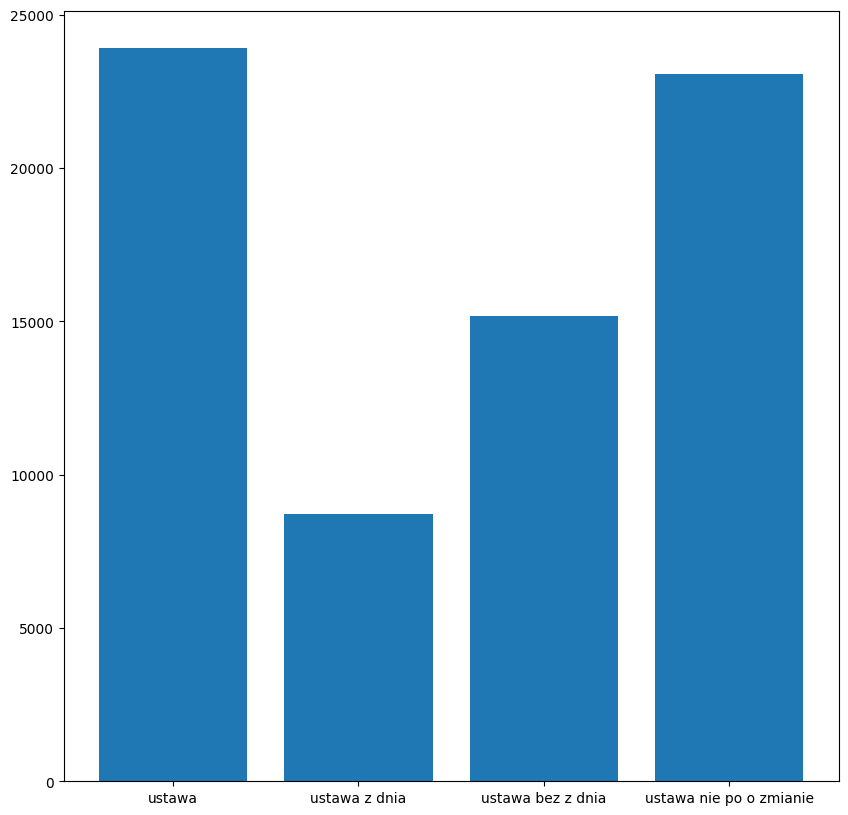

In [68]:
plt.figure(figsize=(10,10))

labels = ['ustawa', 'ustawa z dnia', 'ustawa bez z dnia', 'ustawa nie po o zmianie']
values = [ustawa_count, ustawa_z_dnia_count, ustawa_nie_z_dnia_count, ustawa_nie_o_zmianie_count]
plt.bar(labels, values)